# 匯入工具

In [1187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

# 匯入資料

In [1188]:
# 使用pandas直接讀入csv檔

data = pd.read_csv("train.csv")
valid = pd.read_csv("test.csv")
y_label = data["屬種"]
data.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


# 資料預處理

One-hot encoding

In [1189]:
# pandas的method，將label直接轉為one-hot encoding的表示方式

y = pd.get_dummies(data['屬種'])
y.head()

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


刪除不要的欄位

In [1190]:
# 刪除經由判斷後不會影響結果或是沒有關係的值

del data["id"]
del data["屬種"]
del data["type"]
X = data
X.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


檢查資料量平衡

In [1191]:
# 有些類別資料的資料量若遠低於其他類別將會影響到模型辨別此類資料的結果

temp = y.sum()
temp

Iris-new_type       3
Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
dtype: int64

In [1192]:
add_label_w

120    Iris-new_type
121    Iris-new_type
122    Iris-new_type
Name: 屬種, dtype: object

In [1193]:
# 這裡改善資料量太少的方式是將最少的那類資料用複製的方式增加

import math

add_data = data[y[min(y)]==1]
add_label = y[y[min(y)]==1]
add_label_w = y_label[y[min(y)]==1]

for i in range(math.ceil(temp.mean()/temp["Iris-new_type"])):
    y = y.append(add_label)
    
for i in range(math.ceil(temp.mean()/temp["Iris-new_type"])):
    X = X.append(add_data)

for i in range(math.ceil(temp.mean()/temp["Iris-new_type"])):
    y_label = y_label.append(add_label_w)
    

X = X.reset_index(drop = True)
y = y.reset_index(drop = True)
y_label = y_label.reset_index(drop = True)
y.sum()

Iris-new_type      36
Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
dtype: int64

檢查空值

In [1194]:
# 在蒐集時常常會因為硬體延遲或當機造成某些空值
# 而空值無法丟入模型訓練，所以需要捨棄或填補

X.isnull().sum()

花萼長度    12
花萼寬度    12
花瓣長度     0
花瓣寬度     0
dtype: int64

In [1195]:
# 因為總資料量太少無法再刪
# 這裡將空值以平均的數值填入

X["花萼長度"] = X["花萼長度"].fillna(X[y[min(y)]==1]["花萼長度"].mean())
X["花萼寬度"] = X["花萼寬度"].fillna(X[y[min(y)]==1]["花萼寬度"].mean())

檢查異常值

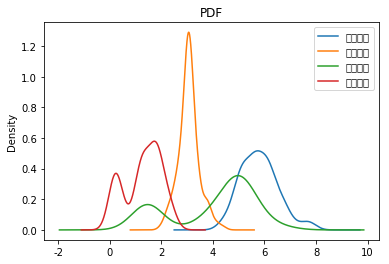

In [1196]:
# 極端的異常值會影響整個模型的結果，造成準確率下降

import pandas as pd
df = pd.DataFrame(X)
df.plot(kind='kde',title='PDF')

In [1197]:
print ('超過最大值的異常值', X[X > (X.mean() + 3 * X.std())].sum())
print ('超過最小值的異常值', X[X < (X.mean() - 3 * X.std())].sum())

超過最大值的異常值 花萼長度    0.0
花萼寬度    4.4
花瓣長度    0.0
花瓣寬度    0.0
dtype: float64
超過最小值的異常值 花萼長度    0.0
花萼寬度    0.0
花瓣長度    0.0
花瓣寬度    0.0
dtype: float64


In [1198]:
X[(X > (X.mean() + 3 * X.std()))>0] = X["花萼寬度"].mean()

In [1199]:
def color_change(y):
    c = []
    for i in range(len(y)-1):
        if y["Iris-new_type"][i] == 1:
            c.insert(i, 'r')
        elif y["Iris-setosa"][i] == 1:
            c.insert(i, 'g')
        elif(y["Iris-versicolor"][i] == 1):
            c.insert(i, 'b')
        elif(y["Iris-virginica"][i] == 1):
            c.insert(i, 'y')
  
    return c

c = color_change(y)

# 資料視覺化

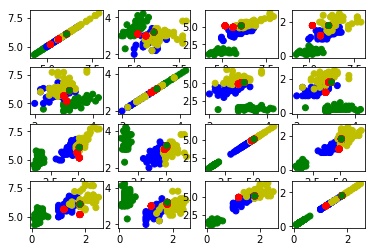

In [1200]:
# 以4個feature輪流作為X Y值，觀察資料在二維空間上的分布
# X方向的feature分別是 花萼長度 花萼寬度 花瓣長度 花瓣寬度 Y方向同上
# 所以在對角線上會成一直線
# 把資料視覺化後很容易可以看到其分佈
# 人所存在的維度只有三維，我們能觀察到的也僅止於三維
# 深度學習幫助我們在更高維中找到資料背後真正的意義

plt.figure()
X = np.vstack((X["花萼長度"],X["花萼寬度"],X["花瓣長度"],X["花瓣寬度"]))
X = X.transpose()
k=1
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, k)
        plt.scatter(X[:,i],X[:,j],c=c)
        k=k+1
        
plt.show()

# 80/20

生成訓練資料

In [1201]:
# 80%的資料拿來訓練其餘20%做為測試資料

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=40)

# 正規化

In [1202]:
# 每個feature的分布都不同，此會在訓練時導致難以收斂
# 經由正規化可以讓所有feature在同一個分布

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler .fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 建模

# KNN

In [1203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))

                 precision    recall  f1-score   support

  Iris-new_type       0.83      1.00      0.91        10
    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.67      0.80         9

    avg / total       0.92      0.91      0.90        32



# RandomForest

In [1204]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

oob_score(accuary): 0.9435483870967742
                 precision    recall  f1-score   support

  Iris-new_type       0.83      1.00      0.91        10
    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.67      0.80         9

    avg / total       0.92      0.91      0.90        32



# SVM

In [1205]:
from sklearn.svm import SVC

#y_train = np.vstack((y_train["Iris-new_type"],y_train["Iris-setosa"],y_train["Iris-versicolor"],y_train["Iris-virginica"]))
#y_train = y_train.transpose()
#y_test = np.vstack((y_test["Iris-new_type"],y_test["Iris-setosa"],y_test["Iris-versicolor"],y_test["Iris-virginica"]))
#y_test = y_test.transpose()

def label_change(y):
    c = []
    for i in range(len(y)):
        if y[i][0] == 1:
            c.insert(i, 'Iris-new_type')
        elif y[i][1] == 1:
            c.insert(i, 'Iris-setosa')
        elif(y[i][2] == 1):
            c.insert(i, 'Iris-versicolor')
        elif(y[i][3] == 1):
            c.insert(i, 'Iris-virginica')
  
    return c

#c = label_change(y_train)
#y_test = label_change(y_test)

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test_std)))

                 precision    recall  f1-score   support

  Iris-new_type       0.71      1.00      0.83        10
    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.44      0.62         9

    avg / total       0.88      0.84      0.83        32



# 模型評估

In [1206]:
print(rfc.score(X_test, y_test))

0.90625


In [1207]:
print(knn.score(X_test, y_test))

0.28125


In [1208]:
print(svc.score(X_test, y_test))

0.09375


In [1209]:
type(x_test)

pandas.core.frame.DataFrame

# 模型測試

In [1211]:
# 在模型評估我們觀察到knn有最高的正確率
# 所以最後選擇knn進行資料測試

x_test = pd.read_csv("test.csv")

prediction = rfc.predict(x_test[["花萼長度","花萼寬度","花瓣長度","花瓣寬度"]])

In [1212]:
from sklearn.preprocessing import LabelEncoder

encX = LabelEncoder()
encX.fit(["Iris-new_type", "Iris-setosa", "Iris-versicolor", "Iris-virginica"])

submission = encX.transform(prediction)
result = {"id":x_test["id"],"type":submission}
result = pd.DataFrame(result)
result.to_csv("prediction.csv")

PermissionError: [Errno 13] Permission denied: 'prediction.csv'